In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import poisson
from scipy.stats import shapiro


In [2]:
csv_file = "/run/user/1000/gvfs/smb-share:server=upcourtinenas,share=cervical/CERVICAL_ID/Connectome_analysis/Final_dataset/Results/all_brains.csv"
df_all = pd.read_csv(csv_file)

only_leaves = True

# Outliers

In [37]:
# Outliers
df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
outlier = df["Synapses"].idxmax()
print(outlier)
val_out = df[df.index == outlier]
val_out


out = ["Right: CP", "Left: ISN"]
out_dict = {
    "Rigth: CP": "too high synapses count, due to sample 580",
    "Left: ISN": "too high cell densoty, due to sample 589"
}

16333


# Synapses Count

### Plot Distribution

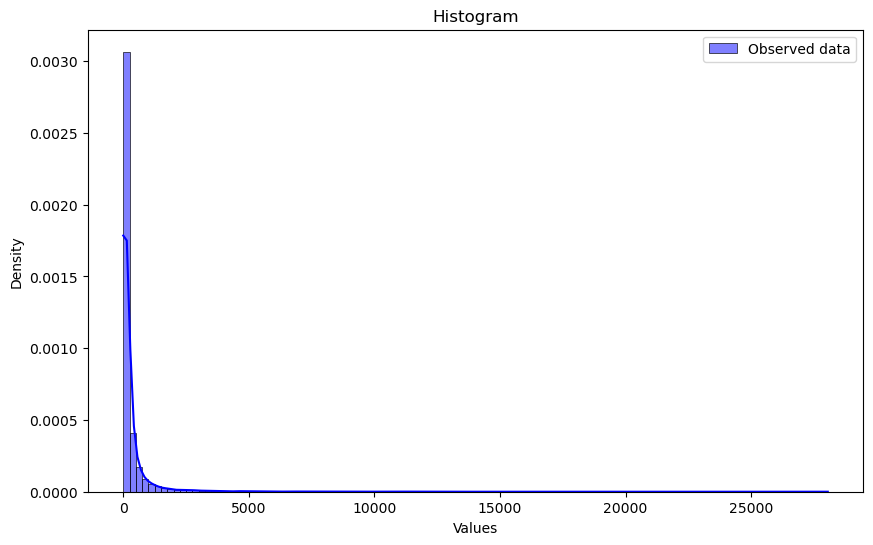

In [19]:
# Plot frequency of the values in the Synapses col
    #NB Only of Unijured as it is the real values
    #NB only leaves
        #bcause otherwise it is nested?????

if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Ectarct Values
values = df["Synapses"].to_list()

plt.figure(figsize=(10, 6))

# Plot histogram of the data
sns.histplot(values, binwidth=250, kde=True, color='blue', edgecolor='black', stat='density', label='Observed data')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram')
plt.legend()
plt.show()



### Test for Normality

In [21]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(values)
print(f'\nStatistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')


Statistic: 0.2704370191410065
P-value: 1.1031937115033502e-125
The data does not appear to be normally distributed (reject H0).


/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19275.
  res = hypotest_fun_out(*samples, **kwds)


### Check Overdispersion

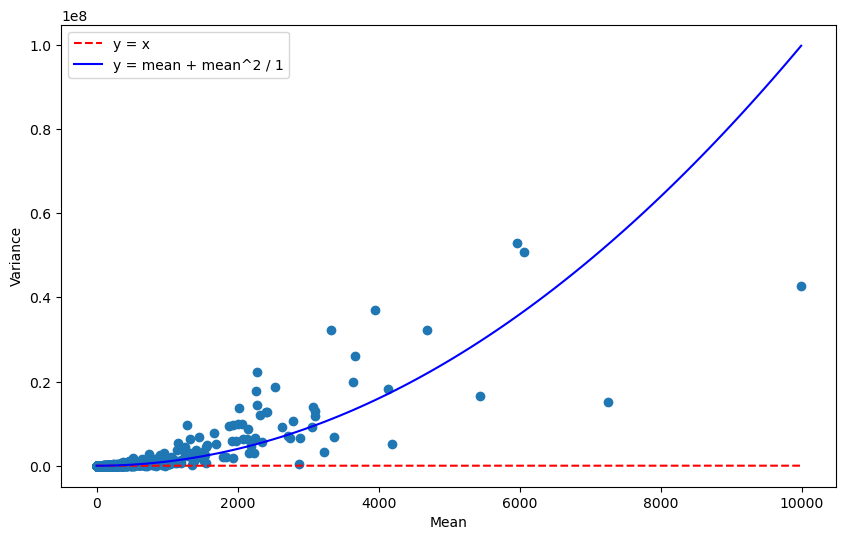

In [23]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Change shape df
df = df.pivot(index="ROI", columns=["Brain ID", "Region Injection", "TimePoint"], values="Synapses")


df["Mean"] = df.mean(axis=1)
df["Variance"] = df.var(axis=1)


plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(df["Mean"], df["Variance"])

# Add y=x line
plt.plot([df["Mean"].min(), df["Mean"].max()], [df["Mean"].min(), df["Mean"].max()], color='red', linestyle='--', label='y = x')

# mu + mu^2/k
k = 1 # This is an example value; adjust based on your data range for better visualization
x_line = np.linspace(df["Mean"].min(), df["Mean"].max(), 100)
y_line = x_line + (x_line ** 2) / k
plt.plot(x_line, y_line, color='blue', linestyle='-', label=f'y = mean + mean^2 / {k}')


plt.xlabel('Mean')
plt.ylabel('Variance')
#plt.yscale('log')
plt.legend()
plt.show()

# Scatterplot Synapses Area

/tmp/ipykernel_204899/2543072893.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


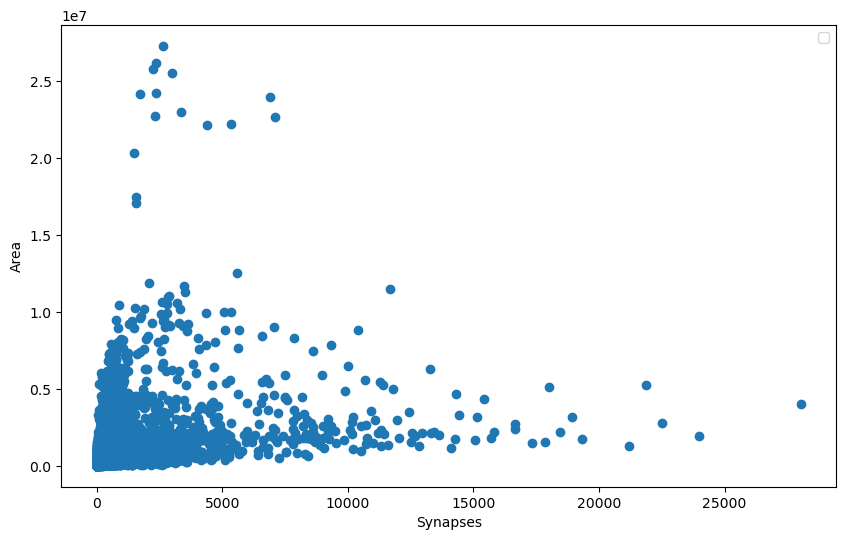

In [30]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(df["Synapses"], df["Area"])

plt.xlabel('Synapses')
plt.ylabel('Area')
#plt.yscale('log')
plt.legend()
plt.show()

# Cell Density

### Plot Distribution

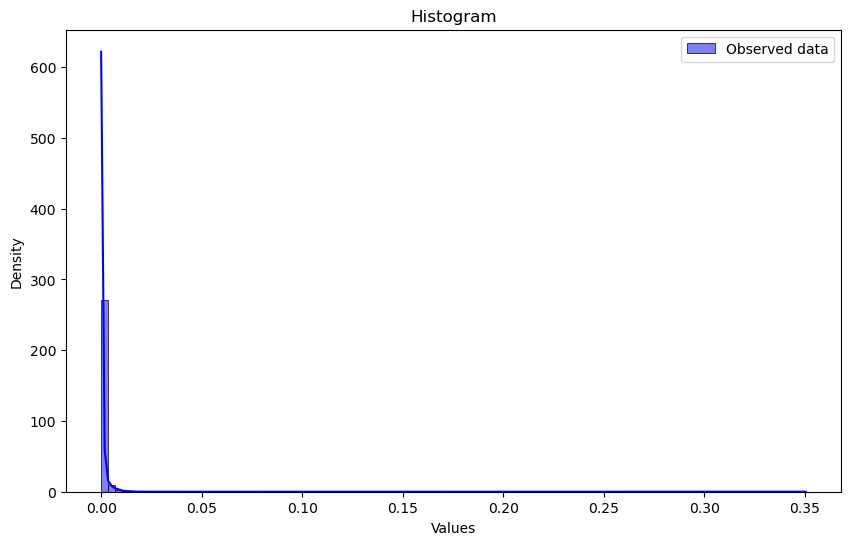

In [28]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Ectarct Values
values = df["Cell Density"].to_list()

plt.figure(figsize=(10, 6))

# Plot histogram of the data
sns.histplot(values, bins=100, kde=True, color='blue', edgecolor='black', stat='density', label='Observed data')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram')
plt.legend()
plt.show()


### Test for Normality

In [31]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(values)
print(f'\nStatistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')


Statistic: 0.14593080195086006
P-value: 3.631288373902388e-130
The data does not appear to be normally distributed (reject H0).


/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19275.
  res = hypotest_fun_out(*samples, **kwds)


### Check Overdispersion

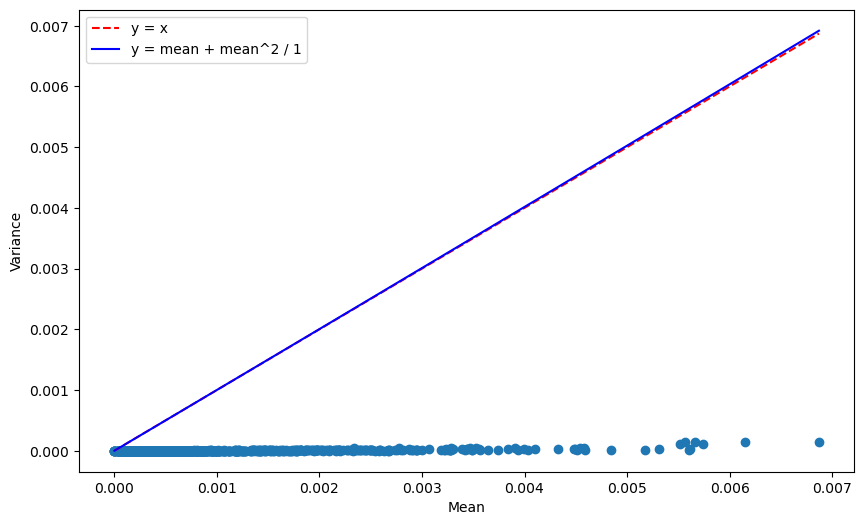

In [38]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Change shape df
df = df.pivot(index="ROI", columns=["Brain ID", "Region Injection", "TimePoint"], values="Cell Density")


df["Mean"] = df.mean(axis=1)
df["Variance"] = df.var(axis=1)


plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(df["Mean"], df["Variance"])

# Add y=x line
plt.plot([df["Mean"].min(), df["Mean"].max()], [df["Mean"].min(), df["Mean"].max()], color='red', linestyle='--', label='y = x')

# mu + mu^2/k
k = 1 # This is an example value; adjust based on your data range for better visualization
x_line = np.linspace(df["Mean"].min(), df["Mean"].max(), 100)
y_line = x_line + (x_line ** 2) / k
plt.plot(x_line, y_line, color='blue', linestyle='-', label=f'y = mean + mean^2 / {k}')


plt.xlabel('Mean')
plt.ylabel('Variance')
#plt.yscale('log')
plt.legend()
plt.show()

dispersion test, which relies on the fact that the Poisson distribution's mean is equal to its variance, and the the ratio of the variance to the mean in a sample of n counts from a Poisson distribution should follow a Chi-square distribution with n-1 degrees of freedom.
(link)[https://stackoverflow.com/questions/59809960/how-do-i-know-if-my-data-fit-a-poisson-distribution-using-r]

In [39]:
import numpy as np
from scipy.stats import chi2

def dispersion_test(x):
    """
    Perform a dispersion test to assess if data follows a Poisson distribution.
    
    Parameters:
    x (array-like): The count data to test.
    
    Returns:
    float: The probability of the data being drawn from a Poisson distribution.
    """
    mean_x = np.mean(x)
    variance_x = np.var(x, ddof=1)  # Use ddof=1 for sample variance
    
    # Calculate the chi-square statistic
    chi2_stat = (variance_x / mean_x) * (len(x) - 1)
    
    # Calculate the p-value
    p_value = 1 - chi2.cdf(chi2_stat, df=len(x) - 1)
    
    # Adjust the result
    result = 1 - 2 * abs(p_value - 0.5)
    
    # Print results
    print("Dispersion test of count data:")
    print(f"{len(x)} data points.")
    print(f"Mean: {mean_x:.3f}")
    print(f"Variance: {variance_x:.3f}")
    print(f"Probability of being drawn from Poisson distribution: {result:.3f}")
    
    return result


Dispersion test of count data:
1000 data points.
Mean: 4.947
Variance: 4.819
Probability of being drawn from Poisson distribution: 0.570


0.5697991840940508

/tmp/ipykernel_179195/2275050422.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = pd.DataFrame({'Values': values, 'Bin': binned_data}).groupby('Bin').agg(['mean', 'var'])


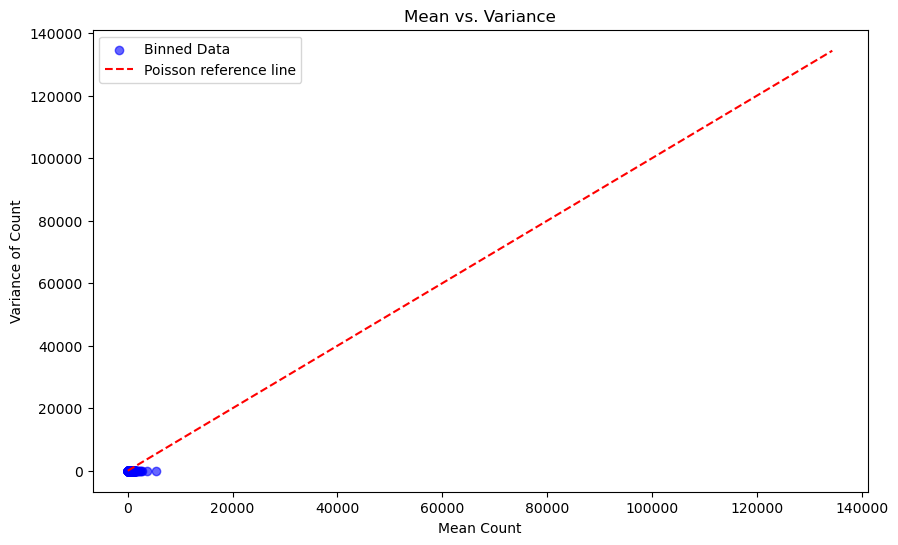

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Flag for filtering data
only_leaves = True

# Filter data based on the flag
if only_leaves:
    values = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]["Synapses"].to_list()
else:
    values = df_all[(df_all["TimePoint"] == "Uninjured")]["Synapses"].to_list()

# Calculate mean and variance
mean = np.mean(values)
variance = np.var(values)

# Plot Mean vs. Variance
plt.figure(figsize=(10, 6))

# Bin the data
bin_edges = np.arange(0, np.max(values) + 1)
binned_data = pd.cut(values, bins=bin_edges)
grouped = pd.DataFrame({'Values': values, 'Bin': binned_data}).groupby('Bin').agg(['mean', 'var'])

# Scatter plot of mean vs. variance
plt.scatter(grouped['Values']['mean'], grouped['Values']['var'], alpha=0.6, color='blue', label='Binned Data')

# Plot the Poisson reference line
x = np.linspace(0, np.max(values), 100)
plt.plot(x, x, 'r--', label='Poisson reference line')

plt.xlabel('Mean Count')
plt.ylabel('Variance of Count')
plt.title('Mean vs. Variance')
plt.legend()
plt.show()
